# IMPORT DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics


In [70]:
df1 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/trinity_evaluasi.csv')
df1.head(5)

,rating,comment,label
0,5,kirim canggih packing rapih produk ori belum c...,positif
1,5,mantul sudah belanjah disiniih seller baikharg...,positif
2,5,mantab fungsi speed booting tingkat detik masu...,positif
3,5,produk bungkus bubble wrap ekspedisi penyoktap...,positif
4,5,terima kasih ssdnya packingannya sesuai harap ...,positif


In [8]:
len(df1)

1040

In [71]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/maxacc_evaluasi.csv')
df2.head(5)

,rating,comment2,label
0,5,produk fungsi layar warna ukur suhu tubuh,positif
1,5,akurasi termometer praktis banget mudah tidak ...,positif
2,5,akurasi kaya mudah harga affordable cobain bat...,positif
3,4,harga bagus akurasi mudah kualitas barang prod...,positif
4,5,harga jangkau akurasi mudah produk asli sesuai...,positif


In [10]:
len(df2)

555

In [72]:
df3 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/seagate_evaluasi.csv')
df3.head(5)

,rating,comment2,label
0,5,kali order hasil kecewa kes packaging super du...,positif
1,5,terima kasih seller penguriman cepat respon ra...,positif
2,5,produk bagus kirim cepat packaging aman rusak,positif
3,5,moga fungsi,positif
4,5,terima kasih seller barang packingan rapih fas...,positif


In [73]:
df1.rename(columns = {'comment':'comment2'}, inplace = True)

In [ ]:
len(df3)

11986

In [74]:
df = pd.concat([df1, df2, df3], axis=0)

In [75]:
df

,rating,comment2,label
0,5,kirim canggih packing rapih produk ori belum c...,positif
1,5,mantul sudah belanjah disiniih seller baikharg...,positif
2,5,mantab fungsi speed booting tingkat detik masu...,positif
3,5,produk bungkus bubble wrap ekspedisi penyoktap...,positif
4,5,terima kasih ssdnya packingannya sesuai harap ...,positif
...,...,...,...
181,5,produk darat kwalitas original,positif
182,3,muas tidak boxnya pakai plastik moga lancar ha...,netral
183,3,kirim dekat sekali dengan batas shopee barang,netral
184,3,produk original daftar suka karena kirim hari ...,netral


In [76]:
print(f"label positif = {len(df[df['label']== 'positif'])} rows")
print(f"label netral = {len(df[df['label']== 'netral'])} rows")
print(f"label negatif = {len(df[df['label']== 'negatif'])} rows")

label positif = 6613 rows
label netral = 171 rows
label negatif = 187 rows


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 11569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    13165 non-null  float64
 1   comment2  13165 non-null  object 
 2   label     13165 non-null  object 
dtypes: float64(1), object(2)
memory usage: 411.4+ KB


In [77]:
df.isnull().sum()

rating      0
comment2    0
label       0
dtype: int64

# PEMBOBOTAN TFIDF

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv = clf.fit_transform(df['comment2'].values.astype('U'))
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [ ]:
print(X_tf)

# PEMBAGIAN DATA TRAINING DAN TESTING

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf, df['label'], test_size = 0.30, stratify=df['label'], random_state = 0)

In [ ]:
print('Positif Class-weight =',13640/(3*12327))
print('Netral Class-weight =',13640/(3*759))
print('Negatif Class-weight =',13640/(3*554))

Positif Class-weight = 0.3688380519726346
Netral Class-weight = 5.990338164251208
Negatif Class-weight = 8.206979542719615


In [ ]:
class_weights = {'positif': 0.3688380519726346, 'netral': 5.990338164251208, 'negatif': 8.206979542719615}

# SVM

In [113]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear', class_weight='balanced') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

In [114]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svm, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svm, average='micro'))

print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9177820267686424
Precision: 0.9177820267686424
Recall: 0.9177820267686424
              precision    recall  f1-score   support

     negatif       0.29      0.27      0.28        56
      netral       0.10      0.16      0.12        51
     positif       0.97      0.96      0.96      1985

    accuracy                           0.92      2092
   macro avg       0.45      0.46      0.46      2092
weighted avg       0.93      0.92      0.92      2092



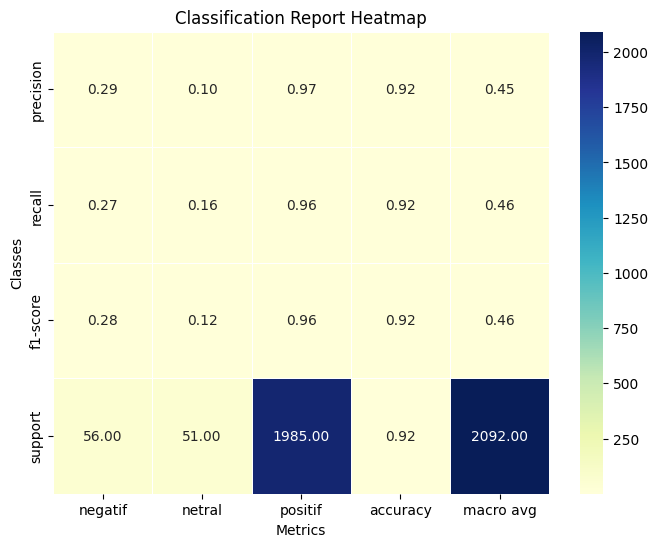

In [115]:
# Classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Konversi ke DataFrame dan tampilkan
report_df = pd.DataFrame(report).transpose()
# print(report_df)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/CR_SVM_Pheriperal_7030.png")
plt.show()


In [116]:
print("\nData Asli:")
print(df['label'].value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = clf_svm.predict(X_tf)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())



Data Asli:
positif    6613
negatif     187
netral      171
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    6445
netral      313
negatif     213
dtype: int64


In [26]:
from sklearn.metrics import confusion_matrix
class_label = ["negative", 'netral',"positive"]

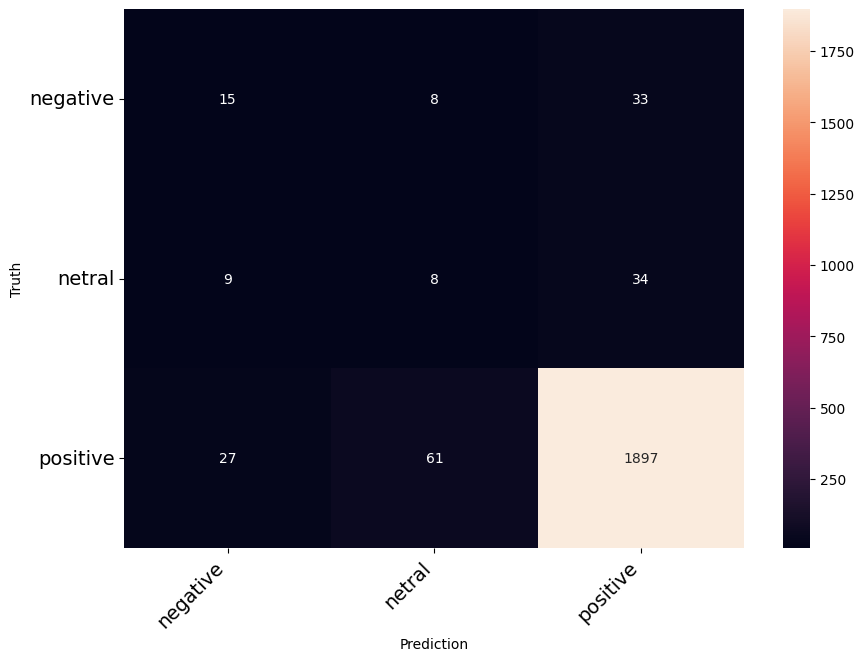

In [117]:
def cnf_matrix_svm(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')
  plt.savefig('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/SVM_CF_Pheriperal_7030.png')


cm = confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm(cm, class_label)

# RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [118]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_rf, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_rf, average='micro'))

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9469407265774379
Precision: 0.9469407265774379
Recall: 0.9469407265774379
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        56
      netral       0.00      0.00      0.00        51
     positif       0.95      1.00      0.97      1985

    accuracy                           0.95      2092
   macro avg       0.32      0.33      0.32      2092
weighted avg       0.90      0.95      0.92      2092



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


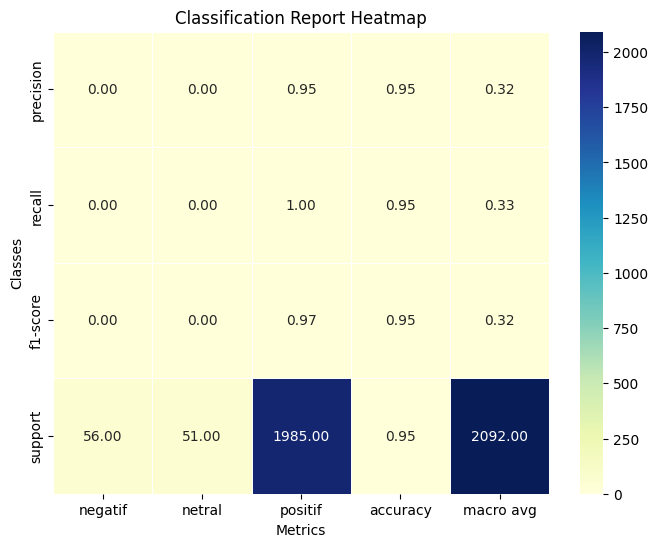

In [120]:
# Classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Konversi ke DataFrame dan tampilkan
report_df = pd.DataFrame(report).transpose()
# print(report_df)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/RF_CR_Pheriperal_7030.png")
plt.show()


In [121]:
print("\nData Asli:")
print(df['label'].value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = rf.predict(X_tf)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    6613
negatif     187
netral      171
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    6709
negatif     133
netral      129
dtype: int64


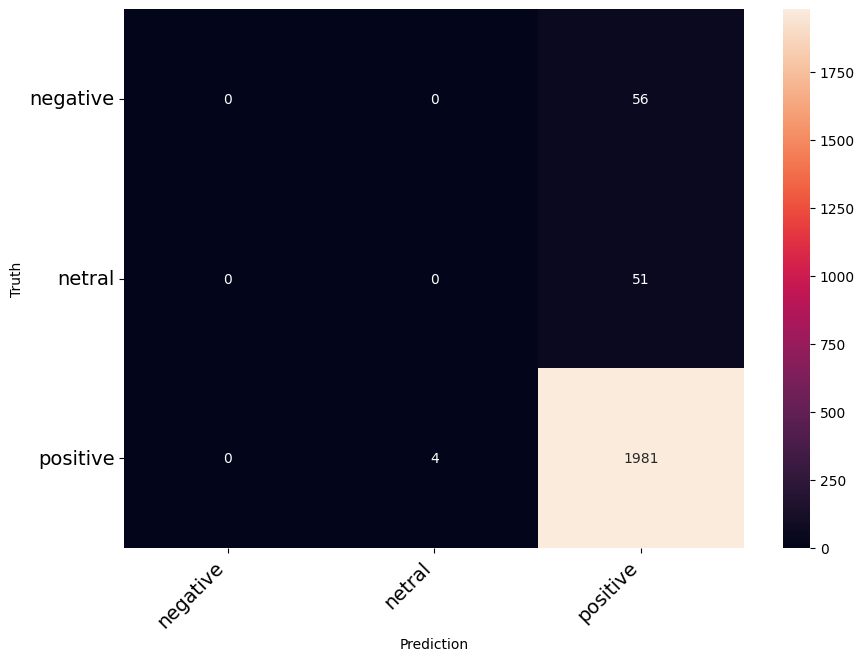

In [122]:
def cnf_matrix_rnf(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')
  plt.savefig('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/RF_CF_Pheriperal_7030.png')


cm = confusion_matrix(y_test, y_pred_rf)
cnf_matrix_rnf(cm, class_label)

# LOGISTIC REGRESION

In [123]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

In [124]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_logreg, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_logreg, average='micro'))

print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.9053537284894837
Precision: 0.9053537284894837
Recall: 0.9053537284894837
              precision    recall  f1-score   support

     negatif       0.34      0.52      0.41        56
      netral       0.09      0.18      0.12        51
     positif       0.97      0.94      0.95      1985

    accuracy                           0.91      2092
   macro avg       0.47      0.54      0.49      2092
weighted avg       0.94      0.91      0.92      2092



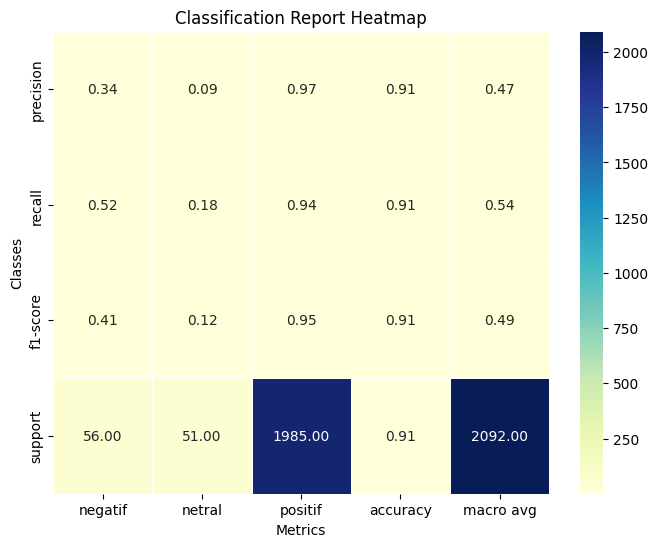

In [125]:
# Classification report
report = classification_report(y_test, y_pred_logreg, output_dict=True)

# Konversi ke DataFrame dan tampilkan
report_df = pd.DataFrame(report).transpose()
# print(report_df)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.savefig("/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/LR_CR_Pheriperal_7030.png")
plt.show()


In [126]:
print("\nData Asli:")
print(df['label'].value_counts())

# Prediksi label dengan menggunakan seluruh data
y_pred_all = logreg.predict(X_tf)
print("\nPrediksi Label dengan Seluruh Data:")
print(pd.Series(y_pred_all).value_counts())


Data Asli:
positif    6613
negatif     187
netral      171
Name: label, dtype: int64

Prediksi Label dengan Seluruh Data:
positif    6300
netral      381
negatif     290
dtype: int64


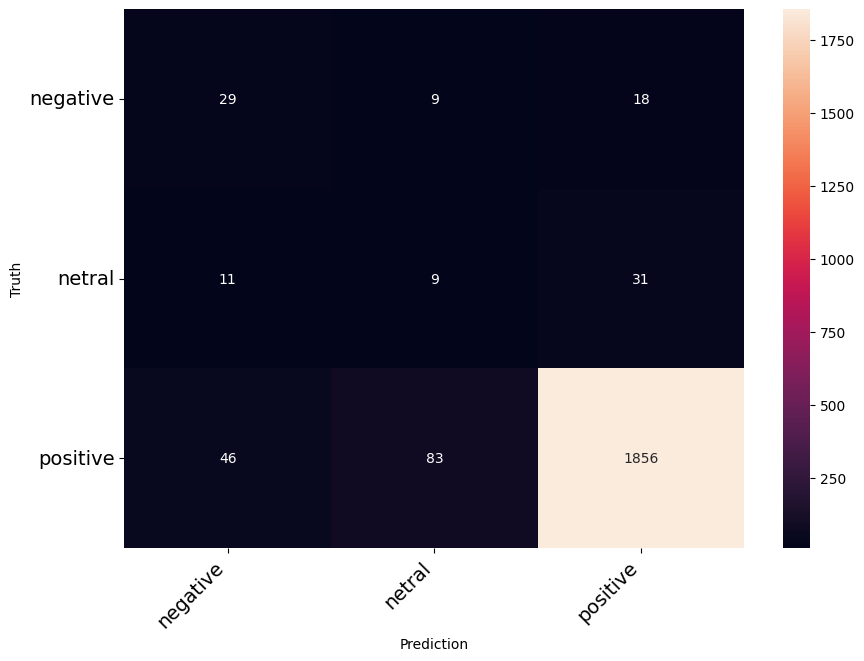

In [127]:
def cnf_matrix_lr(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns= class_names)
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError('Confusion matrix values must be integer.')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('Truth')
  plt.xlabel('Prediction')
  plt.savefig('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Evaluasi/Pheriperal/LR_CF_Pheriperal_7030.png')


cm = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_lr(cm, class_label)

# K-FOLD

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

# Inisialisasi model klasifikasi
models = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=4),
    LogisticRegression(),
    ExtraTreesClassifier(n_estimators=150, random_state=50)
]

# Melakukan cross-validation pada setiap model
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    average_score = scores.mean()
    print(f"Model: {model.__class__.__name__}")
    print(f"Average Accuracy: {average_score}")
    print("---")


Model: MultinomialNB
Average Accuracy: 0.9845438282647585
---


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Model: SVC
Average Accuracy: 0.9845438282647585
---


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Model: RandomForestClassifier
Average Accuracy: 0.9845438282647585
---


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Model: KNeighborsClassifier
Average Accuracy: 0.9837686344663089
---


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Model: LogisticRegression
Average Accuracy: 0.9845438282647585
---


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Model: ExtraTreesClassifier
Average Accuracy: 0.9845438282647585
---


In [ ]:
data = ( 0.8170821114 + 0.9119561494 )/2
print(data)

0.8645191304


In [ ]:
data1 = ( 0.8773826979+ 0.9472422062 )/2
print(data1)

0.91231245205


In [129]:
data2 = ( 0.897455374097987 + 0.947651487988526 )/2
print(data2)

0.9225534310432566
